In [3]:
from torchvision import datasets
data_path = './data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Using downloaded and verified file: ./data\cifar-10-python.tar.gz
Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
# Dataset的父类及继承关系
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [9]:
print(len(cifar10))
print(cifar10.classes)

50000
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [10]:
class_names = cifar10.classes
img, label = cifar10[100]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x18C73313438>, 8, 'ship')

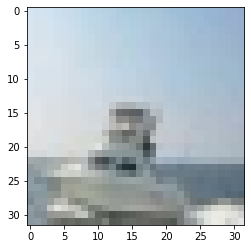

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure()
plt.imshow(img)
plt.show()

Dataset:
It is an object that is required to implement two methods: <code>__len__</code> and <code>__getitem__</code>. The former should return the number of items in the dataset; the latter should return the item, consisting of a sample and its corresponding label (an integer index).

PyTorch中的Dataset类：
Dataset类必须要实现两个函数：<code>__len__</code> 和 <code>__getitem__</code>。前者返回这个数据集中项目的数量；后者返回项目实体，包含一个样本和其标签。

![Dataset](https://dpzbhybb2pdcj.cloudfront.net/stevens2/Figures/CH07_F02_Stevens2_GS.png)

<code>torchvision.transforms</code> module defines a set of composable, function-like objects that can be passed as an argument to a torchvision dataset such as <code>datasets.CIFAR10(...)</code>, and that perform transformations on the data after it is loaded but before it is returned by <code>__getitem__</code>.

<code>torchvision.transforms</code>模块定义了一系列可组合的函数，可以将其最为<code>datasets.CIFAR10</code>等数据节的一个参数。然后就可以在加载数据之后，使用数据之前对其数据进行处理转换。

In [15]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [16]:
to_tensor = transforms.ToTensor()
img_tensor = to_tensor(img)
img_tensor.shape

torch.Size([3, 32, 32])

In [17]:
# In[10]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [21]:
img_tensor, _ = tensor_cifar10[100]
type(img_tensor)

torch.Tensor

PIL(Python Image Library):Python图片数据

在使用<code>ToTensor()</code>进行数据转换时，会将原本三通道的0-255的数据，转换为0.0-1.0之间的浮点型数据。

In [22]:
img_tensor.min(), img_tensor.max()

(tensor(0.1176), tensor(0.9490))

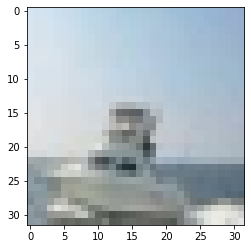

In [25]:
plt.imshow(img_tensor.permute(1, 2, 0))
plt.show()

In [27]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [51]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [52]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [53]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


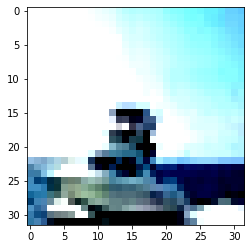

In [54]:
# In[21]:
img_t, _ = transformed_cifar10[100]
 
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
data_path = './data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [6]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
 
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))
 
learning_rate = 1e-2
 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
 
loss_fn = nn.NLLLoss()
 
n_epochs = 100
 
for epoch in range(n_epochs):
    for imgs, labels in train_loader:

        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])
torch.Size([64, 3, 32, 32])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])
torch.Size([64, 3, 32, 32])
tensor([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])
torch.Size([64, 3, 32, 32])
tensor([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
torch.Size([64, 3, 32, 32])
tensor([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1

KeyboardInterrupt: 